In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer
import sys
from pathlib import Path

# Ensure src is in the Python path
try:
    ROOT = Path(__file__).resolve().parent.parent
except NameError:
    ROOT = Path().resolve().parent
sys.path.append(str(ROOT))

from src.config import DATA_RAW, DATA_PROCESSED, OUTPUT_PLOTS
from src.data_loader import load_all_csv
from src.preprocessing import preprocess
from src.tags import tag_events, tag_frequencies
from src.anomaly_detection import detect_anomalies
from src.plotting import plot_time_with_events, scatter_ion_vs_conv_by_state, plot_time_with_state_bands, plot_time_with_tag_markers, plot_anomalies
pd.set_option("display.max_columns", None)

# Load Data/data_loader

In [ ]:
df = pd.read_csv(DATA_PROCESSED / "processed_edaALL.csv")
#df = load_all_csv()
#df.head()

Combined data saved to ..\data\processed\merged_all_raw_data.csv


,date,time,ion_analog,voltage_ion,pressure_ion,conv_analog,voltage_conv,pressure_conv,tags,source_file
0,2025-06-23,14:06:02,444.0,2.19,2.440000e-07,193.0,0.954,0.00101,"IG on, CG on",arduino_data_log20250623_140602_e-gun-cathode-...
1,2025-06-23,14:06:03,445.0,2.20,2.500000e-07,194.0,0.959,0.00103,"IG on, CG on",arduino_data_log20250623_140602_e-gun-cathode-...
2,2025-06-23,14:06:04,444.0,2.19,2.440000e-07,194.0,0.959,0.00103,"IG on, CG on",arduino_data_log20250623_140602_e-gun-cathode-...
3,2025-06-23,14:06:05,445.0,2.20,2.500000e-07,194.0,0.959,0.00103,"IG on, CG on",arduino_data_log20250623_140602_e-gun-cathode-...
4,2025-06-23,14:06:06,444.0,2.19,2.440000e-07,193.0,0.954,0.00101,"IG on, CG on",arduino_data_log20250623_140602_e-gun-cathode-...


# Clean data/preprocessing

In [ ]:
# drops unnecessary columns like analog and merges date and time to datetime column
df_cleaned_engineered = preprocess(df)
df_cleaned_engineered.head()

,voltage_ion,pressure_ion,voltage_conv,pressure_conv,tags,source_file,delta_ion,delta_conv,log_pressure_ion,log_pressure_conv,delta_log_ion,delta_log_conv,roll5_mean_ion,roll5_std_ion,roll5_min_ion,roll5_max_ion,roll15_mean_ion,roll15_std_ion,roll15_min_ion,roll15_max_ion,roll5_mean_conv,roll5_std_conv,roll5_min_conv,roll5_max_conv,roll15_mean_conv,roll15_std_conv,roll15_min_conv,roll15_max_conv,slope_ion,slope_conv
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2025-06-23 14:06:02,2.19,2.440000e-07,0.954,0.00101,"IG on, CG on",arduino_data_log20250623_140602_e-gun-cathode-...,NaN,NaN,-15.226098,-6.897805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-06-23 14:06:03,2.20,2.500000e-07,0.959,0.00103,"IG on, CG on",arduino_data_log20250623_140602_e-gun-cathode-...,6.000000e-09,0.00002,-15.201805,-6.878196,0.024293,0.019608,2.470000e-07,3.000000e-09,2.440000e-07,2.500000e-07,NaN,NaN,NaN,NaN,0.001020,0.000010,0.00101,0.00103,NaN,NaN,NaN,NaN,NaN,NaN
2025-06-23 14:06:04,2.19,2.440000e-07,0.959,0.00103,"IG on, CG on",arduino_data_log20250623_140602_e-gun-cathode-...,-6.000000e-09,0.00000,-15.226098,-6.878196,-0.024293,0.000000,2.460000e-07,2.828427e-09,2.440000e-07,2.500000e-07,NaN,NaN,NaN,NaN,0.001023,0.000009,0.00101,0.00103,NaN,NaN,NaN,NaN,NaN,NaN
2025-06-23 14:06:05,2.20,2.500000e-07,0.959,0.00103,"IG on, CG on",arduino_data_log20250623_140602_e-gun-cathode-...,6.000000e-09,0.00000,-15.201805,-6.878196,0.024293,0.000000,2.470000e-07,3.000000e-09,2.440000e-07,2.500000e-07,NaN,NaN,NaN,NaN,0.001025,0.000009,0.00101,0.00103,NaN,NaN,NaN,NaN,NaN,NaN
2025-06-23 14:06:06,2.19,2.440000e-07,0.954,0.00101,"IG on, CG on",arduino_data_log20250623_140602_e-gun-cathode-...,-6.000000e-09,-0.00002,-15.226098,-6.897805,-0.024293,-0.019608,2.464000e-07,2.939388e-09,2.440000e-07,2.500000e-07,NaN,NaN,NaN,NaN,0.001022,0.000010,0.00101,0.00103,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_cleaned_engineered.isnull().sum()

voltage_ion          477
pressure_ion         477
voltage_conv         660
pressure_conv        660
tags                   0
source_file            0
delta_ion            485
delta_conv           667
log_pressure_ion     477
log_pressure_conv    660
delta_log_ion        485
delta_log_conv       667
roll5_mean_ion       465
roll5_std_ion        465
roll5_min_ion        465
roll5_max_ion        465
roll15_mean_ion      463
roll15_std_ion       463
roll15_min_ion       463
roll15_max_ion       463
roll5_mean_conv      651
roll5_std_conv       651
roll5_min_conv       651
roll5_max_conv       651
roll15_mean_conv     663
roll15_std_conv      663
roll15_min_conv      663
roll15_max_conv      663
slope_ion            589
slope_conv           739
dtype: int64

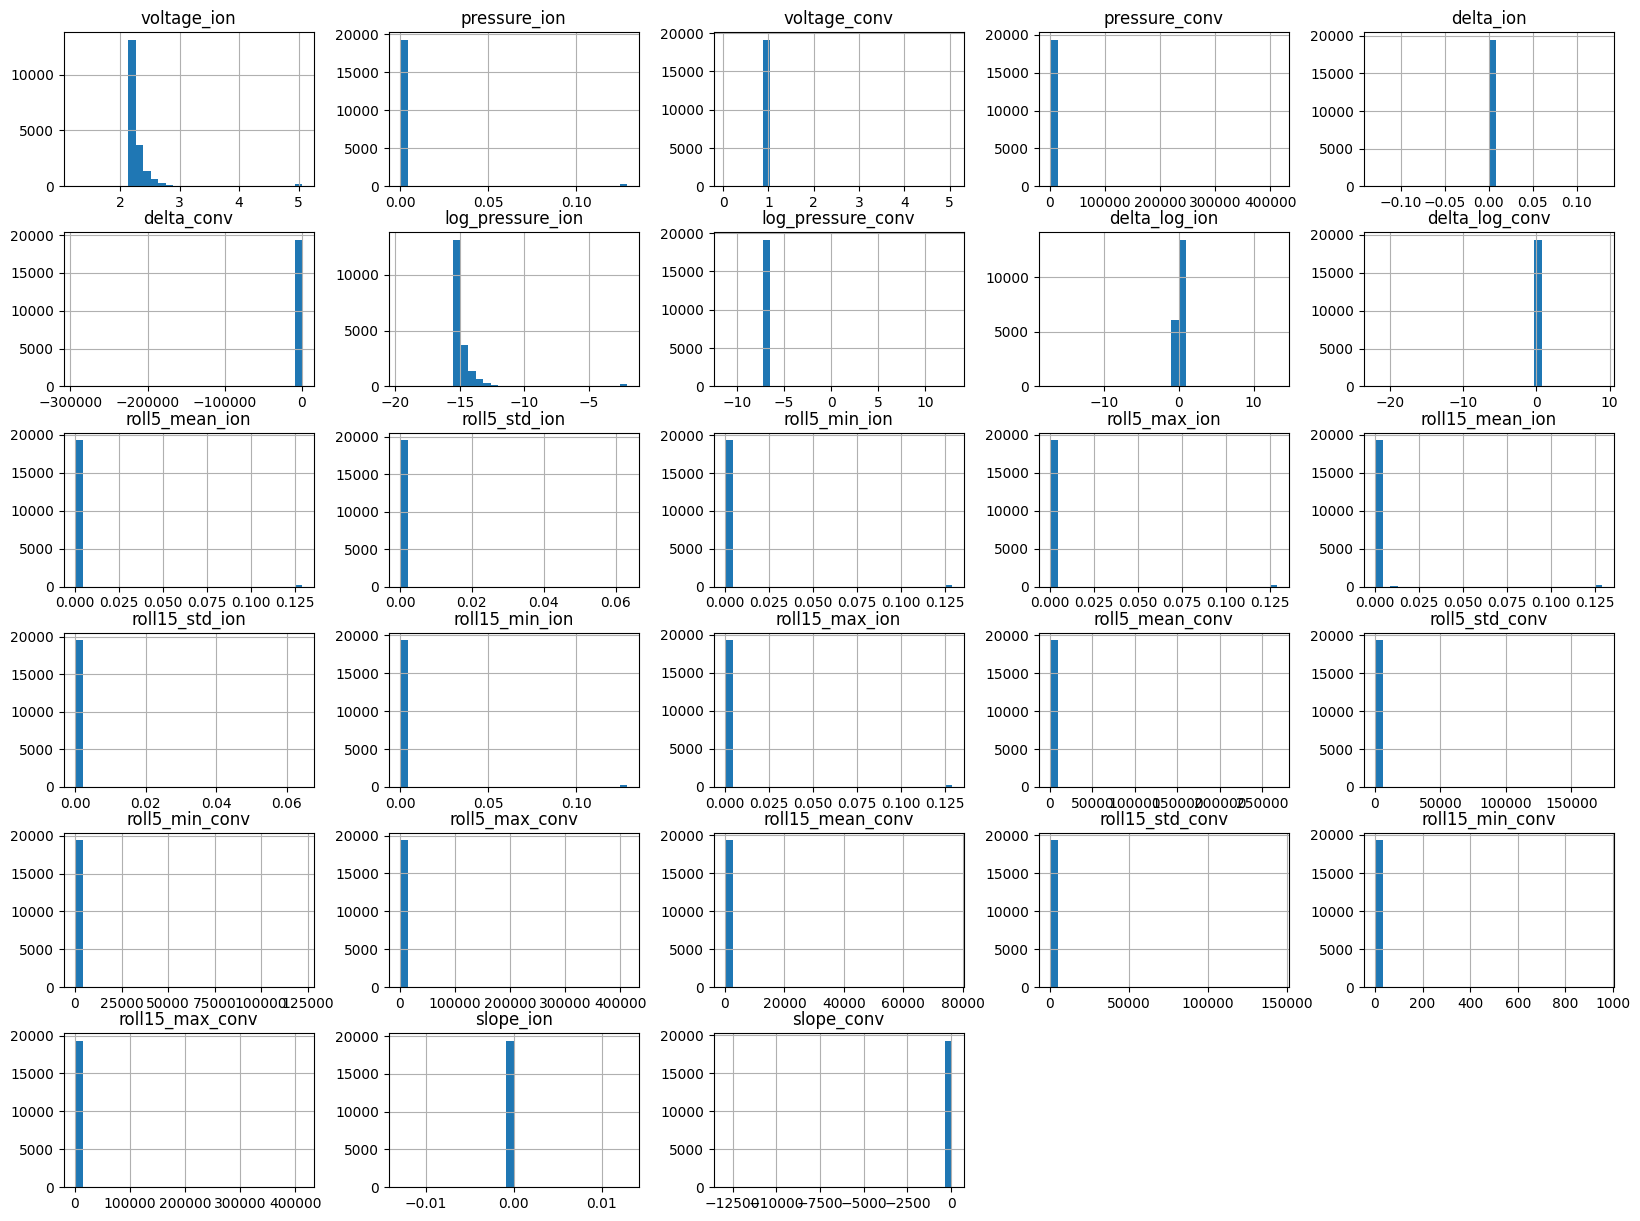

In [ ]:
df_cleaned_engineered.hist(bins=30, figsize=(20,15))
plt.show()

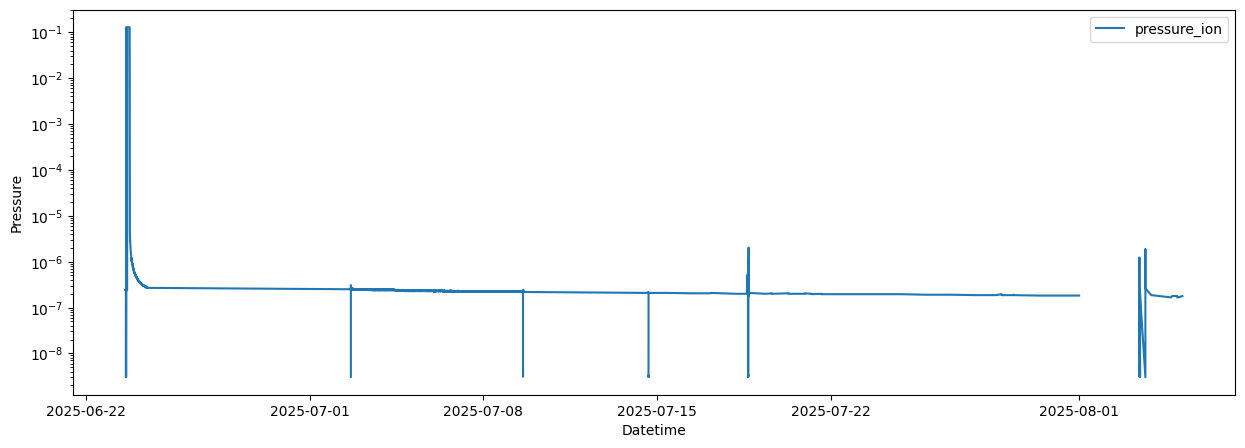

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df_cleaned_engineered.index, df_cleaned_engineered['pressure_ion'], label='pressure_ion')
plt.yscale("log")
plt.xlabel('Datetime')
plt.ylabel('Pressure')
plt.legend()
plt.show()


<Axes: >

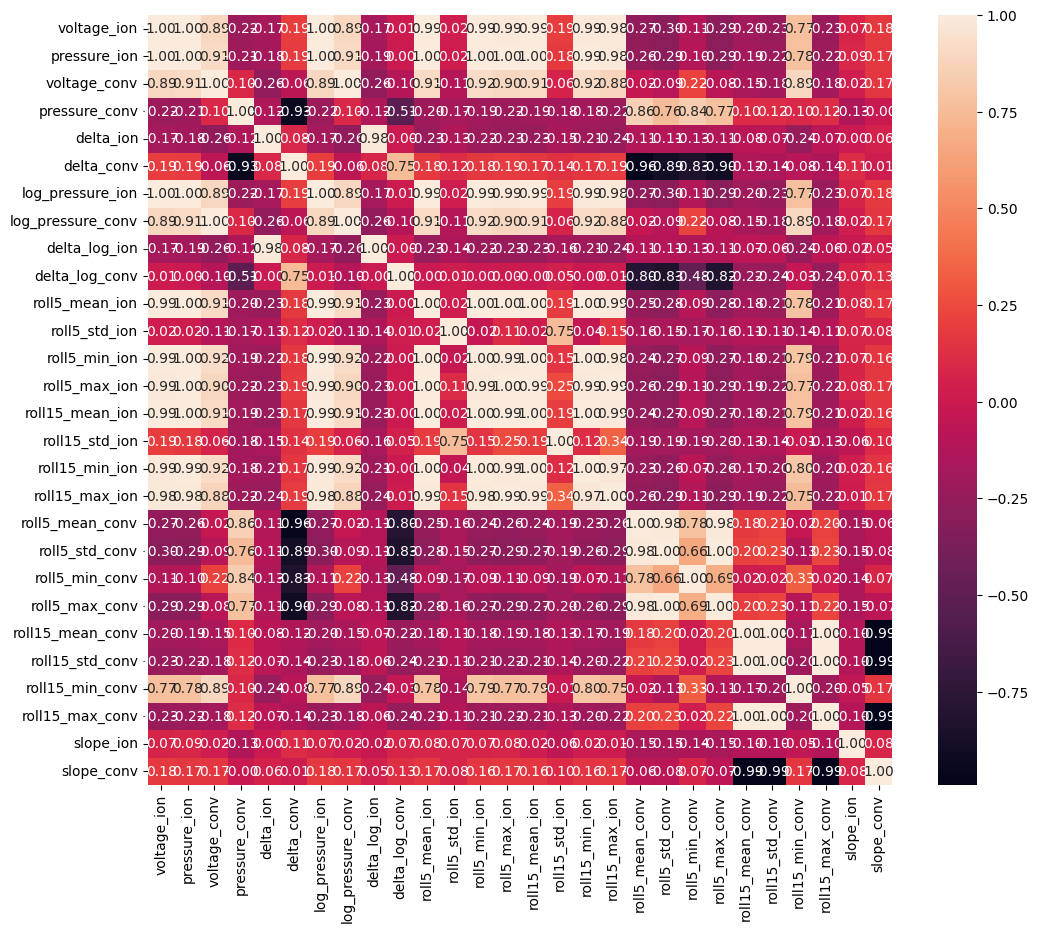

In [ ]:
import seaborn as sns
df_heatmapv1 = df_cleaned_engineered.select_dtypes(include='number').corr()
plt.figure(figsize=(12, 10))
sns.heatmap(df_heatmapv1.corr(), annot=True, fmt=".2f")

<Axes: >

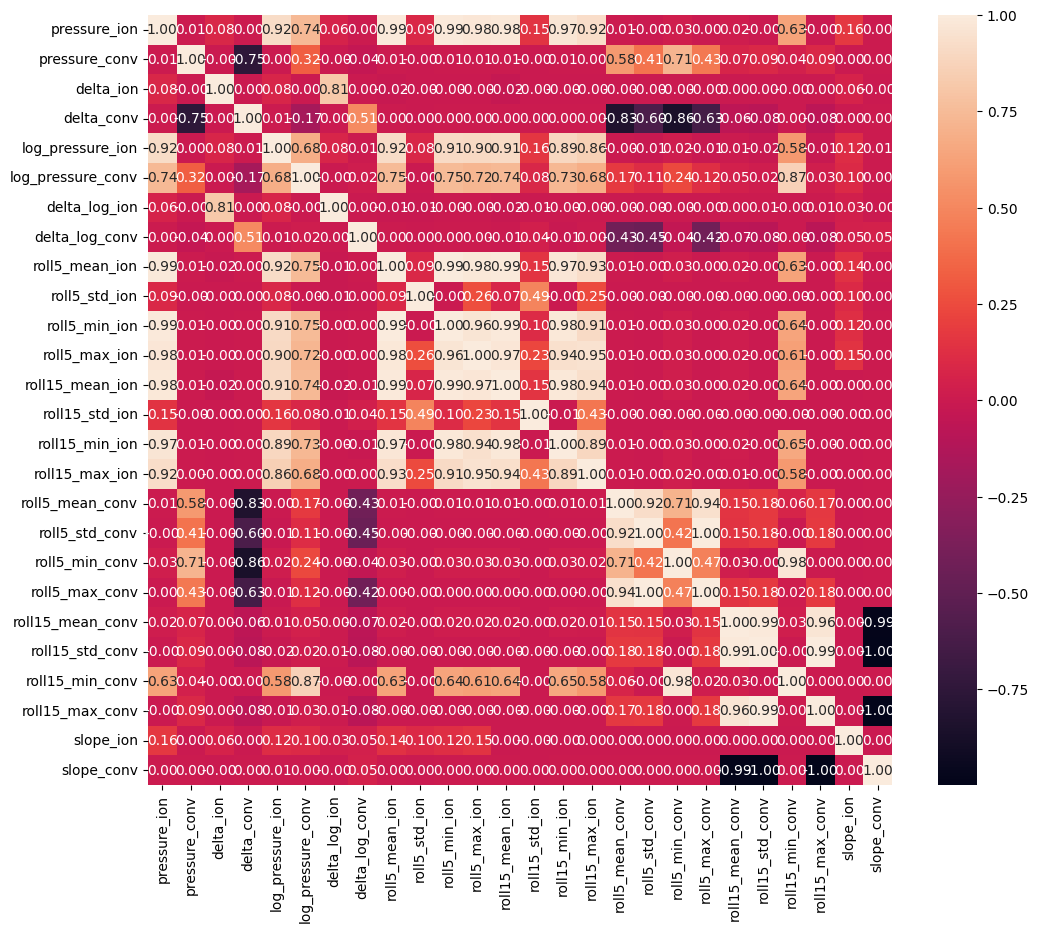

In [ ]:
# drop voltage from heatmap
df_heatmapv2 = df_cleaned_engineered.copy().drop(columns=['voltage_ion', 'voltage_conv'], errors='ignore')
plt.figure(figsize=(12, 10))
sns.heatmap(df_heatmapv2.select_dtypes(include='number').corr(), annot=True, fmt=".2f")

# Tags analysis

Create binary columns for key tag types

In [ ]:
# Parse tags into list
#  Add binary columns for using MultiLabelBinarizer from sklearn
# Derive IG_state & CG_state

df_tags = tag_events(df_cleaned_engineered)

df_tags.head()

c:\Users\CAMILA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:900: UserWarning: unknown class(es) ['IG turn off', 'RP on', 'chamber open', 'gate manipulation', 'venting'] will be ignored
  warnings.warn(


,voltage_ion,pressure_ion,voltage_conv,pressure_conv,tags,source_file,delta_ion,delta_conv,log_pressure_ion,log_pressure_conv,delta_log_ion,delta_log_conv,roll5_mean_ion,roll5_std_ion,roll5_min_ion,roll5_max_ion,roll15_mean_ion,roll15_std_ion,roll15_min_ion,roll15_max_ion,roll5_mean_conv,roll5_std_conv,roll5_min_conv,roll5_max_conv,roll15_mean_conv,roll15_std_conv,roll15_min_conv,roll15_max_conv,slope_ion,slope_conv,tag_list,tag_IG_on,tag_IG_off,tag_IG_fail,tag_IG_turn_on,tag_IG_slow_on,tag_CG_on,tag_CG_off,tag_CG_turn_off,tag_CG_turn_on,IG_state,CG_state
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2025-06-23 14:06:02,2.19,2.440000e-07,0.954,0.00101,"IG on, CG on",arduino_data_log20250623_140602_e-gun-cathode-...,NaN,NaN,-15.226098,-6.897805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[IG on, CG on]",1,0,0,0,0,1,0,0,0,IG on,CG on
2025-06-23 14:06:03,2.20,2.500000e-07,0.959,0.00103,"IG on, CG on",arduino_data_log20250623_140602_e-gun-cathode-...,6.000000e-09,0.00002,-15.201805,-6.878196,0.024293,0.019608,2.470000e-07,3.000000e-09,2.440000e-07,2.500000e-07,NaN,NaN,NaN,NaN,0.001020,0.000010,0.00101,0.00103,NaN,NaN,NaN,NaN,NaN,NaN,"[IG on, CG on]",1,0,0,0,0,1,0,0,0,IG on,CG on
2025-06-23 14:06:04,2.19,2.440000e-07,0.959,0.00103,"IG on, CG on",arduino_data_log20250623_140602_e-gun-cathode-...,-6.000000e-09,0.00000,-15.226098,-6.878196,-0.024293,0.000000,2.460000e-07,2.828427e-09,2.440000e-07,2.500000e-07,NaN,NaN,NaN,NaN,0.001023,0.000009,0.00101,0.00103,NaN,NaN,NaN,NaN,NaN,NaN,"[IG on, CG on]",1,0,0,0,0,1,0,0,0,IG on,CG on
2025-06-23 14:06:05,2.20,2.500000e-07,0.959,0.00103,"IG on, CG on",arduino_data_log20250623_140602_e-gun-cathode-...,6.000000e-09,0.00000,-15.201805,-6.878196,0.024293,0.000000,2.470000e-07,3.000000e-09,2.440000e-07,2.500000e-07,NaN,NaN,NaN,NaN,0.001025,0.000009,0.00101,0.00103,NaN,NaN,NaN,NaN,NaN,NaN,"[IG on, CG on]",1,0,0,0,0,1,0,0,0,IG on,CG on
2025-06-23 14:06:06,2.19,2.440000e-07,0.954,0.00101,"IG on, CG on",arduino_data_log20250623_140602_e-gun-cathode-...,-6.000000e-09,-0.00002,-15.226098,-6.897805,-0.024293,-0.019608,2.464000e-07,2.939388e-09,2.440000e-07,2.500000e-07,NaN,NaN,NaN,NaN,0.001022,0.000010,0.00101,0.00103,NaN,NaN,NaN,NaN,NaN,NaN,"[IG on, CG on]",1,0,0,0,0,1,0,0,0,IG on,CG on


# Summary tag frequencies

In [10]:
# Tag frequencies
print("Tag Frequencies:\n", tag_frequencies(df_tags))

Tag Frequencies:
                   Tag  Count
0               CG on  19374
1               IG on  19276
2              IG off    719
3              CG off    658
4             venting    136
5               RP on    120
6   gate manipulation     64
7          IG turn on     27
8          IG slow on     18
9          CG turn on     12
10       chamber open     11
11        IG turn off     10
12        CG turn off      5
13            IG fail      5


# Detect anomalies

In [11]:
pd.set_option("display.max_columns", None)
df_altered = detect_anomalies(df_tags)
print(df_altered.shape)
df_altered[['anomaly_if', 'score_if_raw', 'score_if']]

(20047, 45)


,anomaly_if,score_if_raw,score_if
datetime,,,
2025-06-23 14:06:02,1,0.321597,-0.321597
2025-06-23 14:06:03,1,0.334680,-0.334680
2025-06-23 14:06:04,1,0.341792,-0.341792
2025-06-23 14:06:05,1,0.344306,-0.344306
2025-06-23 14:06:06,1,0.335172,-0.335172
...,...,...,...
2025-08-04 19:22:17,1,0.242918,-0.242918
2025-08-04 23:10:23,1,0.250533,-0.250533
2025-08-04 23:10:24,1,0.235835,-0.235835


In [12]:
df_altered[df_altered['anomaly_if'] == 1].describe()

,voltage_ion,pressure_ion,voltage_conv,pressure_conv,delta_ion,delta_conv,log_pressure_ion,log_pressure_conv,delta_log_ion,delta_log_conv,roll5_mean_ion,roll5_std_ion,roll5_min_ion,roll5_max_ion,roll15_mean_ion,roll15_std_ion,roll15_min_ion,roll15_max_ion,roll5_mean_conv,roll5_std_conv,roll5_min_conv,roll5_max_conv,roll15_mean_conv,roll15_std_conv,roll15_min_conv,roll15_max_conv,slope_ion,slope_conv,tag_IG_on,tag_IG_off,tag_IG_fail,tag_IG_turn_on,tag_IG_slow_on,tag_CG_on,tag_CG_off,tag_CG_turn_off,tag_CG_turn_on,anomaly_if,score_if_raw,score_if
count,19369.000000,1.936900e+04,19186.000000,19186.000000,1.936100e+04,19180.000000,19369.000000,19186.000000,19361.000000,19180.000000,1.938100e+04,1.938100e+04,1.938100e+04,1.938100e+04,1.938300e+04,1.938300e+04,1.938300e+04,1.938300e+04,19195.000000,19195.000000,19195.000000,19195.000000,19183.000000,19183.000000,19183.000000,19183.000000,1.925700e+04,1.911000e+04,19846.000000,19846.000000,19846.000000,19846.000000,19846.000000,19846.000000,19846.000000,19846.000000,19846.000000,19846.0,19846.000000,19846.000000
mean,2.259040,3.134536e-04,0.956888,96.060650,-1.332277e-05,-77.163712,-14.921230,-6.885589,0.000028,-0.005273,3.279001e-04,3.375027e-05,3.065927e-04,3.864823e-04,3.558166e-04,8.872001e-05,2.999028e-04,5.861057e-04,133.932602,142.594826,18.912183,352.123989,91.217623,222.237477,0.001001,749.101819,-5.956783e-06,-2.658481e+00,0.971128,0.026403,0.000252,0.001310,0.000907,0.966190,0.033155,0.000252,0.000504,1.0,0.352717,-0.352717
std,0.191571,6.346982e-03,0.083300,5519.666350,1.311080e-03,4139.605818,0.879480,0.402660,0.213652,0.321912,6.347003e-03,1.361395e-03,6.277321e-03,7.046518e-03,6.469352e-03,1.964989e-03,6.208555e-03,8.672457e-03,4655.771469,4319.890407,1512.721479,10853.925541,2072.262151,4798.613793,0.000252,16110.075479,2.881260e-04,1.676031e+02,0.167452,0.160335,0.015871,0.036172,0.030103,0.180745,0.179046,0.015871,0.022442,0.0,0.054411,0.054411
min,1.240000,3.020000e-09,0.039500,0.000012,-1.290000e-01,-294000.000000,-19.618009,-11.322305,-17.274140,-22.103024,3.130000e-09,0.000000e+00,3.020000e-09,3.240000e-09,1.333786e-07,0.000000e+00,3.020000e-09,1.900000e-07,0.000754,0.000000,0.000012,0.000983,0.000935,0.000000,0.000012,0.000983,-1.289932e-02,-1.293929e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000173,-0.393844
25%,2.180000,2.280000e-07,0.954000,0.001010,-5.000000e-09,-0.000020,-15.293920,-6.897805,-0.021693,-0.019608,2.260000e-07,2.001819e-09,2.230000e-07,2.280000e-07,2.260000e-07,0.000000e+00,2.230000e-07,2.280000e-07,0.000999,0.000000,0.000983,0.001010,0.001005,0.000000,0.000983,0.001030,-1.428571e-10,-6.750000e-07,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.356436,-0.380291
50%,2.190000,2.440000e-07,0.954000,0.001010,0.000000e+00,0.000000,-15.226098,-6.897805,0.000000,0.000000,2.420000e-07,2.449490e-09,2.390000e-07,2.440000e-07,2.423333e-07,3.635932e-10,2.390000e-07,2.440000e-07,0.001014,0.000003,0.001010,0.001030,0.001012,0.000000,0.000983,0.001030,-1.785714e-11,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.370733,-0.370733
75%,2.290000,3.760000e-07,0.959000,0.001030,5.000000e-09,0.000020,-14.793677,-6.878196,0.021693,0.019608,3.728000e-07,3.021139e-09,3.680000e-07,3.850000e-07,3.744000e-07,2.851703e-09,3.680000e-07,3.850000e-07,0.001018,0.000010,0.001010,0.001030,0.001018,0.000000,0.001010,0.001030,7.142857e-11,7.714286e-07,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.380291,-0.356436
max,5.060000,1.290000e-01,5.060000,413000.000000,2.880000e-05,0.004050,-2.047943,12.931203,6.439075,3.706636,1.290000e-01,6.319352e-02,1.290000e-01,1.290000e-01,1.290000e-01,6.435312e-02,1.290000e-01,1.290000e-01,267500.000000,173578.671789,122000.000000,413000.000000,76428.572613,143707.894873,0.007850,413000.000000,1.151826e-02,1.045714e-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000

In [13]:
# stats
print(df_altered[["pressure_ion","pressure_conv"]].describe())
print(df_altered["IG_state"].value_counts())

       pressure_ion  pressure_conv
count  1.957000e+04   19387.000000
mean   1.608804e-03     112.427689
std    1.431444e-02    5622.526377
min    3.020000e-09       0.000012
25%    2.280000e-07       0.001010
50%    2.440000e-07       0.001010
75%    3.760000e-07       0.001030
max    1.290000e-01  413000.000000
IG_state
IG on         19275
IG off          717
IG turn on       27
IG slow on       17
IG unknown        6
IG fail           5
Name: count, dtype: int64


In [14]:
#  time vs ion and convectron pressure w event markers
p_time_with_events = plot_time_with_events(
	df_altered,
	savepath=OUTPUT_PLOTS / "plot_time_events2.png"
)
# scatter ion vs conv by IG state
p_scatter = scatter_ion_vs_conv_by_state(
	df_altered.copy().reset_index(),
	savepath=OUTPUT_PLOTS / "scatter_ion_vs_conv_by_state2.png"
)

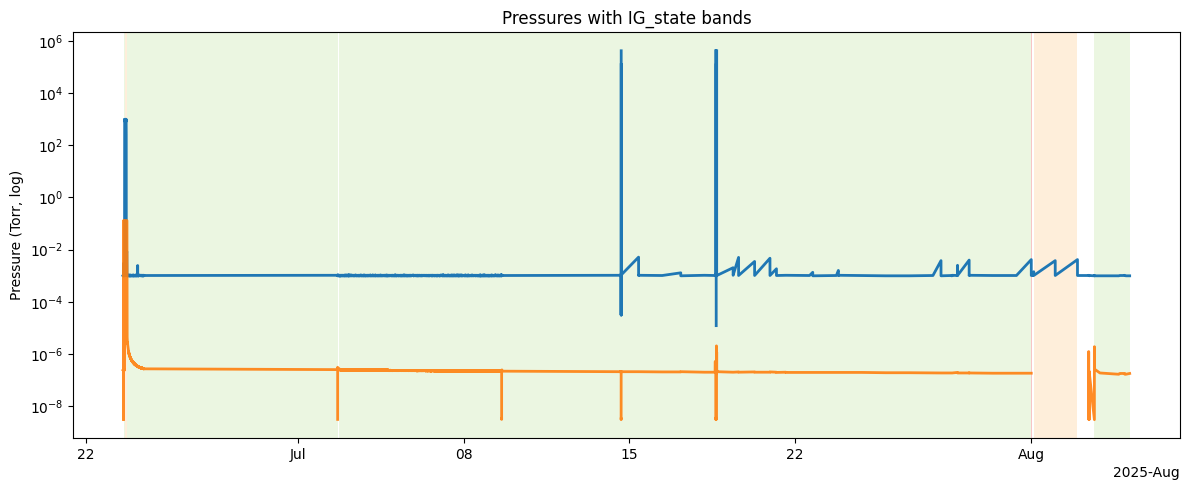

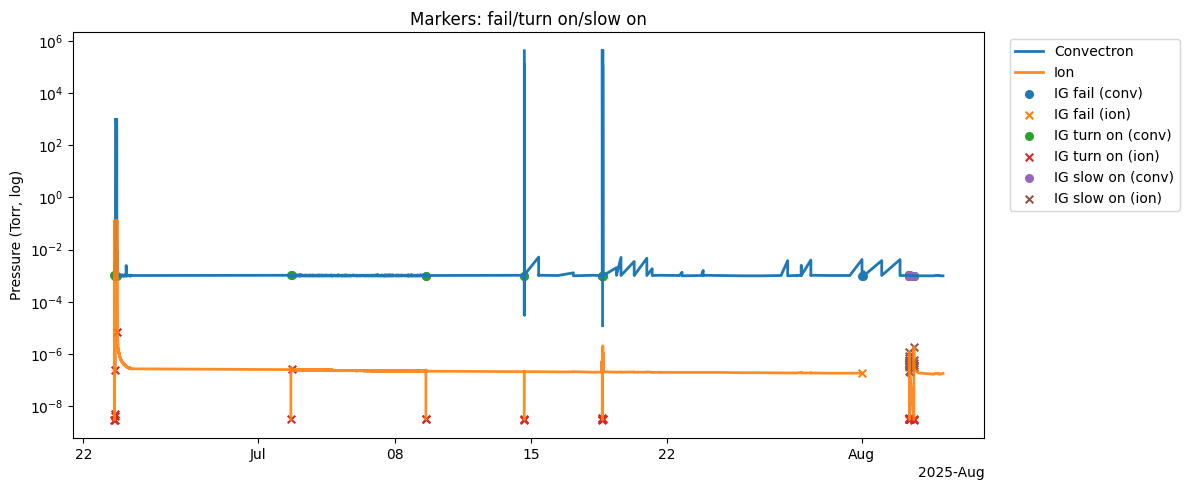

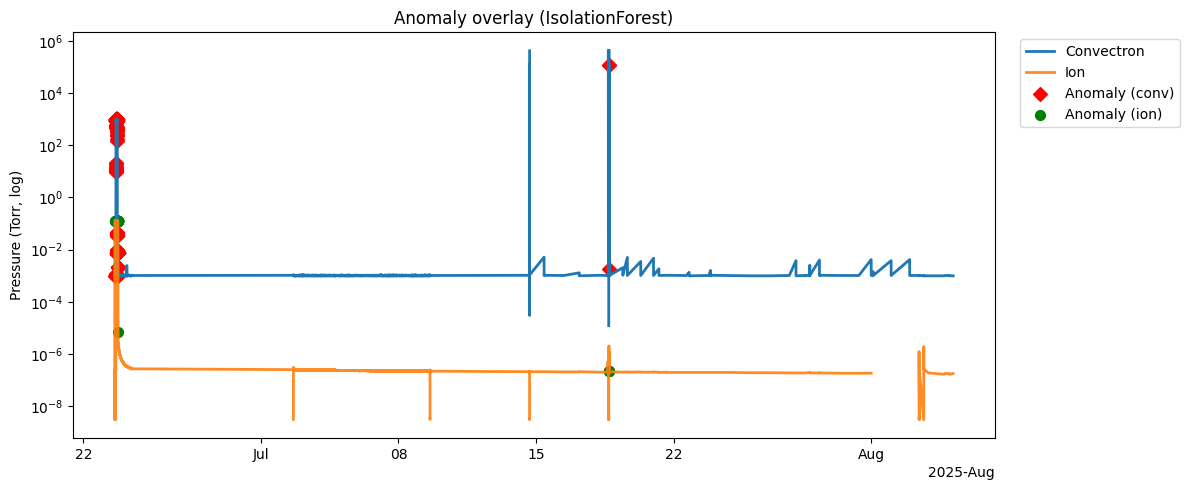

In [15]:

plot_time_with_state_bands(df_altered.reset_index(), title="Pressures with IG_state bands")

plot_time_with_tag_markers(
    df_altered.copy().reset_index(), 
    tags_to_mark=("IG fail", "IG turn on", "IG slow on"),
    title="Markers: fail/turn on/slow on"
)

plot_anomalies(df_altered.copy().reset_index(), title="Anomaly overlay (IsolationForest)", savepath=OUTPUT_PLOTS / "anomalies_overlay2.png")


In [ ]:
out = DATA_PROCESSED / "processed_eng.csv"
df_altered.to_csv(out, index=False)
print(f"Saved combined data to {out}")

Saved combined data to ..\data\processed\processed_all.csv
